### Análise Exploratória de Dados - Evolução do Coronavírus no Brasil

# Introdução

Em dezembro de 2019, a cidade de Wuhan, localizada na província de Hubei, na China, vivenciou um surto de pneumonia de causa desconhecida.

Em janeiro de 2020, pesquisadores chineses identificaram um novo coronavírus (SARS-CoV-2) como agente etiológico de uma síndrome respiratória aguda grave, denominada doença do coronavírus 2019, ou simplesmente COVID-19 (Coronavírus Disease – 2019).

No Brasil, os primeiros casos foram confirmados no mês de fevereiro, e diversas ações foram implementadas a fim de conter e de mitigar o avanço da doença. 

A consolidação dos dados sobre casos e óbitos por COVID-19, coletados e disponibilizados pelas Secretarias Estaduais de Saúde, vem sendo realizada desde o início da pandemia pelo Ministério da Saúde brasileiro. Isso permite o conhecimento da dinâmica da doença no país e, consequentemente, o estabelecimento de políticas para desacelerar o incremento no número de casos.

# Objetivos

Analisar os dados de covid no Brasil ao longo do tempo, com o uso de recursos python.

**Definição dos dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [2]:
def configurar_plot(titulo, x, y, altura, largura):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(altura, largura)
    plt.show()

In [3]:
df = pd.read_csv('dataset/brazil_covid19.csv')

In [4]:
df = df.rename(columns = {
    'date': 'data',
    'region': 'regiao',
    'state': 'estado',
    'cases': 'casos',
    'deaths': 'mortes'
})

In [5]:
df.head(10)

,data,regiao,estado,casos,mortes
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
5,2020-02-25,Nordeste,BA,0,0
6,2020-02-25,Nordeste,CE,0,0
7,2020-02-25,Nordeste,MA,0,0
8,2020-02-25,Nordeste,PB,0,0
9,2020-02-25,Nordeste,PE,0,0


In [6]:
df.tail(10)

,data,regiao,estado,casos,mortes
4364,2020-08-04,Norte,RO,41239,898
4365,2020-08-04,Norte,RR,33194,528
4366,2020-08-04,Norte,TO,27664,408
4367,2020-08-04,Sudeste,ES,86209,2628
4368,2020-08-04,Sudeste,MG,135728,2894
4369,2020-08-04,Sudeste,RJ,168911,13715
4370,2020-08-04,Sudeste,SP,575589,23702
4371,2020-08-04,Sul,PR,82718,2128
4372,2020-08-04,Sul,RS,73618,2099
4373,2020-08-04,Sul,SC,92157,1235


In [7]:
# Descrevendo características estatísticas básicas do dataset

df.describe()

,casos,mortes
count,4374.000000,4374.000000
mean,25332.077961,1069.287151
std,51409.341995,2577.504820
min,0.000000,0.000000
25%,119.000000,3.000000
50%,4186.000000,138.000000
75%,30551.000000,884.000000
max,575589.000000,23702.000000


In [8]:
# Top 10 maiores estados agrupados por número de casos

analise_1 = df.groupby("estado").sum().sort_values(by = "casos").tail(10)
analise_1.head()

,casos,mortes
estado,,
DF,3832609,51225
MG,4096816,91330
PE,4836418,376989
AM,5544244,228535
BA,5890784,144835


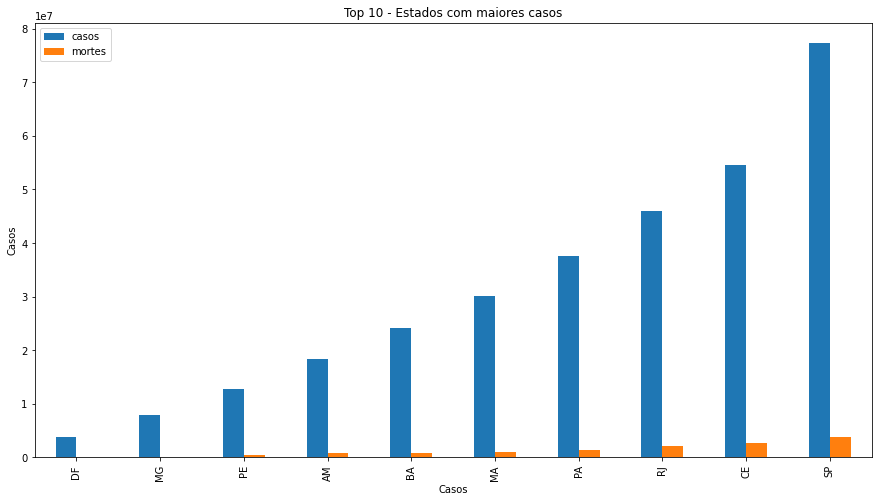

In [9]:
analise_1.cumsum().plot(kind = 'bar')
configurar_plot('Top 10 - Estados com maiores casos', 'Casos', 'Casos', 15, 8)

In [10]:
# Função para converter valores do dataset no formato padrão

def converterData(data):
    return datetime.strptime(data, "%Y-%m-%d").date()

In [11]:
datas = df["data"]
for i in range(len(datas)):
    df.loc[i, "data"] = converterData(datas[i])

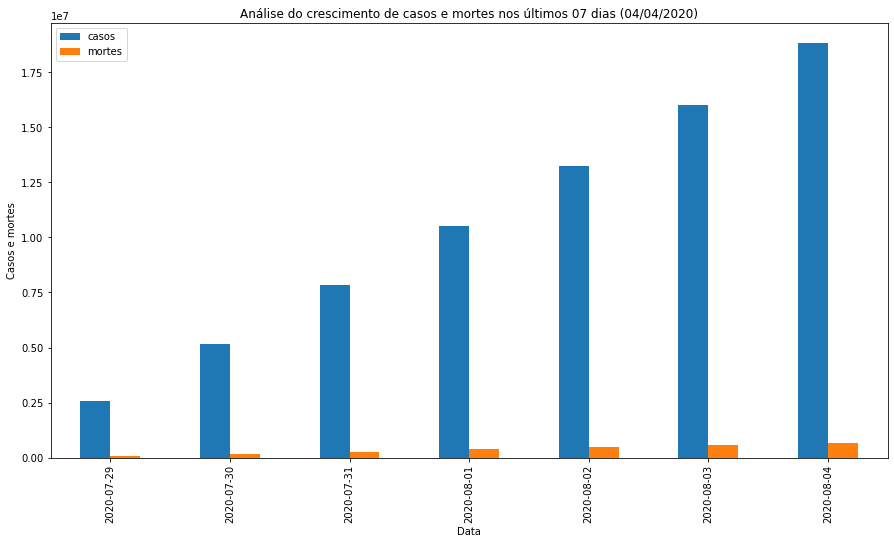

In [12]:
analise_2 = df.groupby("data").sum().sort_values(by = "casos").tail(7)

analise_2.cumsum().plot(kind = 'bar')

configurar_plot(
    "Análise do crescimento de casos e mortes nos últimos 07 dias (04/04/2020)", 
    "Data",
    "Casos e mortes",
    15,
    8
)

In [13]:
# Filtrando sempre pela última data do CSV

ultima_data = df["data"].max()
df_ultima_data = df[df["data"] == ultima_data].sort_values(by = "casos")
df_ultima_data

,data,regiao,estado,casos,mortes
4360,2020-08-04,Norte,AC,20708,545
4366,2020-08-04,Norte,TO,27664,408
4349,2020-08-04,Centro-Oeste,MS,27678,432
4365,2020-08-04,Norte,RR,33194,528
4362,2020-08-04,Norte,AP,36999,581
4364,2020-08-04,Norte,RO,41239,898
4358,2020-08-04,Nordeste,RN,52566,1926
4357,2020-08-04,Nordeste,PI,54443,1401
4350,2020-08-04,Centro-Oeste,MT,56169,1921
4359,2020-08-04,Nordeste,SE,61069,1509


<AxesSubplot:title={'center':'Análise de casos por estados em 04/08/2020'}, xlabel='estado'>

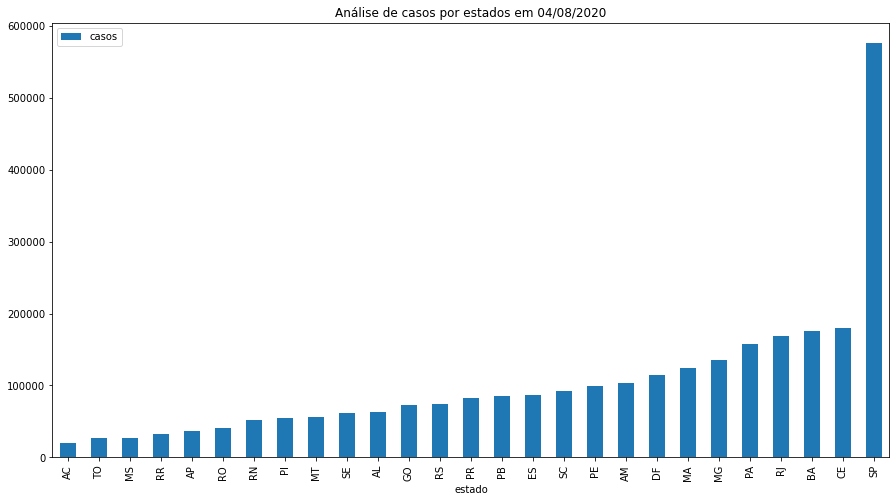

In [14]:
# Analisando casos por estados na última data presente no CSV

date_format = "%d/%m/%Y"
ultima_data = ultima_data.strftime(date_format)

df_plot = df_ultima_data[["estado", "casos"]]

df_plot.index = df_ultima_data["estado"]
df_plot.plot(
    title = "Análise de casos por estados em {}".format(ultima_data),
    kind = "bar", 
    figsize = (15, 8)
)

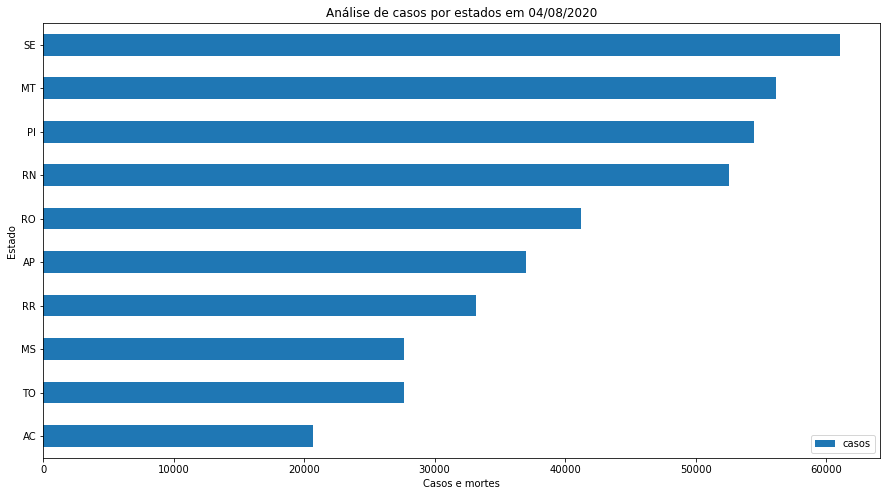

In [15]:
# Analisando top 10 estados com menos casos por estados na última data presente no CSV

df_plot = df_ultima_data[["estado", "casos"]]
df_plot.index = df_ultima_data["estado"]
df_plot.head(10).plot(kind = "barh")

configurar_plot(
    "Análise de casos por estados em {}".format(ultima_data), 
    "Casos e mortes",
    "Estado",
    15,
    8
)

In [16]:
# Agrupando os casos pela região

df_group_regiao = df_ultima_data[["regiao", "casos"]].groupby(["regiao"]).sum().sort_values(by = "casos")
df_group_regiao.head()

,casos
regiao,
Sul,248493
Centro-Oeste,271002
Norte,421350
Nordeste,894639
Sudeste,966437


<AxesSubplot:title={'center':'Análise de casos por região em 04/08/2020'}, xlabel='regiao'>

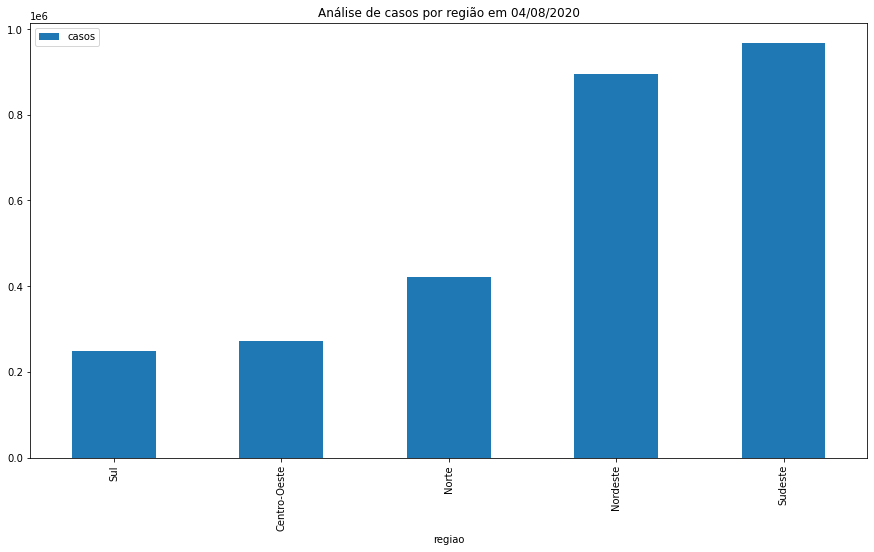

In [17]:
# Analisando a quantidade de casos por região

df_group_regiao.plot(
    title = "Análise de casos por região em {}".format(ultima_data),
    kind = "bar", 
    figsize = (15, 8)
)

<AxesSubplot:title={'center':'Análise de mortes por região em 04/08/2020'}, xlabel='regiao'>

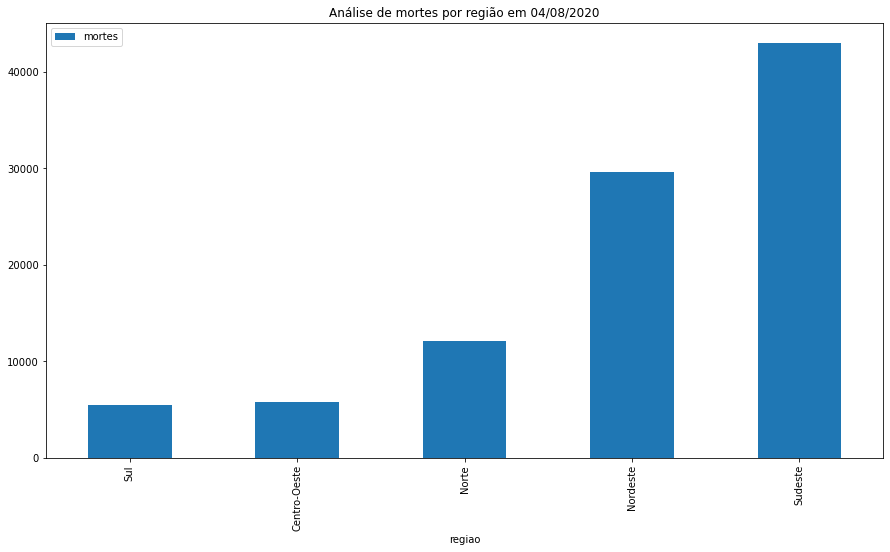

In [18]:
# Agrupando os casos pela região

df_group_regiao_mortes = df_ultima_data[["regiao", "mortes"]].groupby(["regiao"]).sum().sort_values(by = "mortes")

# Analisando a quantidade de casos por região

df_group_regiao_mortes.plot(
    title = "Análise de mortes por região em {}".format(ultima_data),
    kind = "bar", 
    figsize = (15, 8)
)

C:\Users\Bianca\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


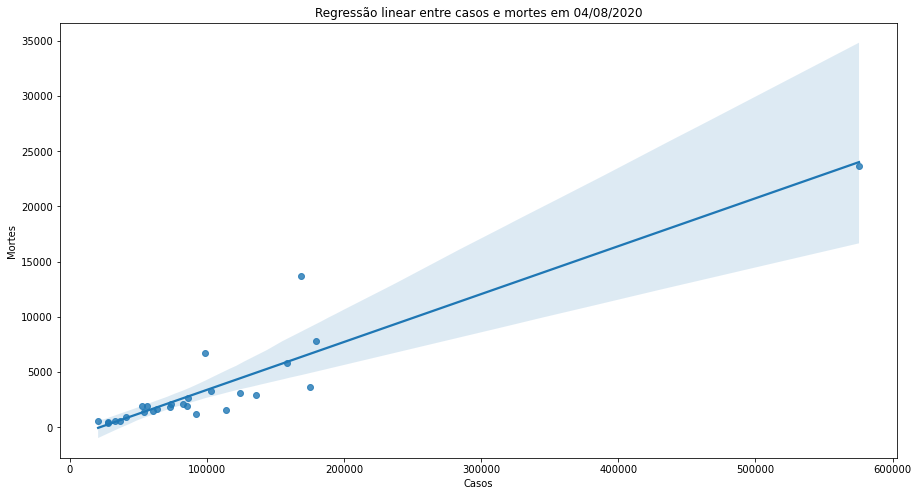

In [19]:
# Regressão linear das variáveis casos e mortes

df_reg_casos_mortes = df_ultima_data[["casos", "mortes"]]
casos = df_reg_casos_mortes["casos"]
mortes = df_reg_casos_mortes["mortes"]

sns.regplot(casos, mortes, df_reg_casos_mortes)
plt.xlabel("Casos")
plt.ylabel("Mortes")
plt.title("Regressão linear entre casos e mortes em {}".format(ultima_data))
plt.gcf().set_size_inches(15, 8)

<AxesSubplot:title={'center':'Média de casos e mortes agrupados por data em 04/08/2020'}, xlabel='data'>

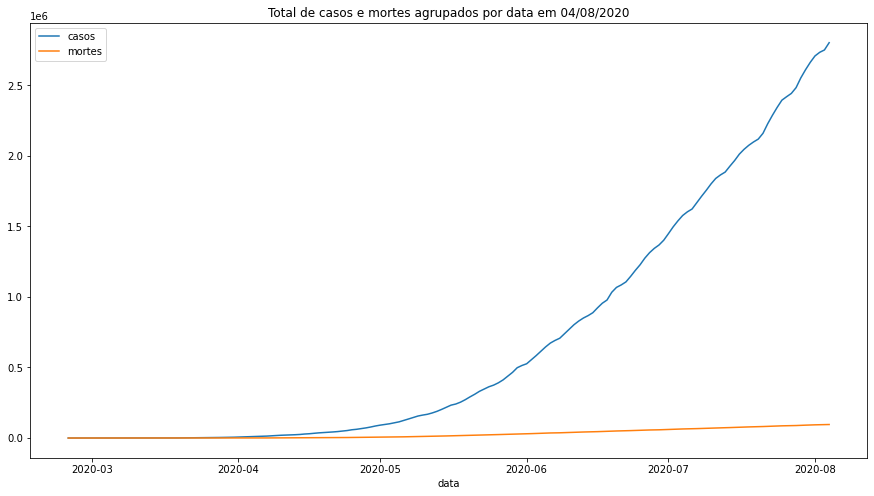

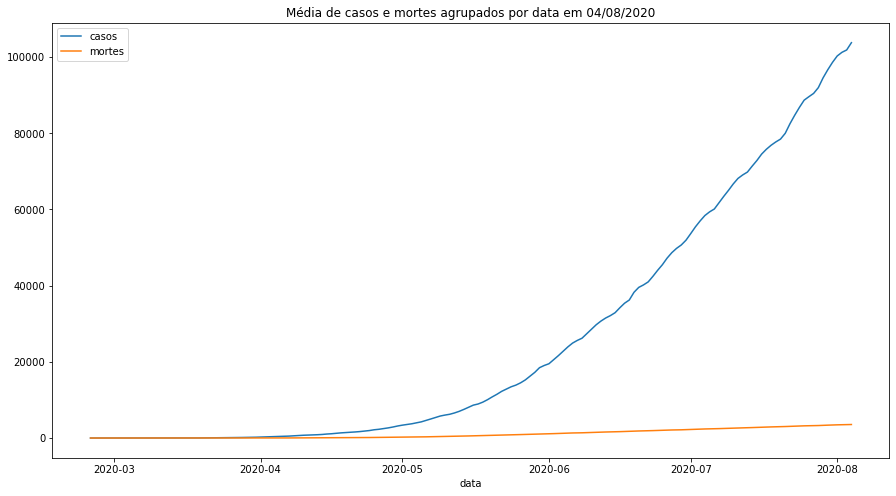

In [20]:
df_group_data_sum = df[["data", "casos", "mortes"]].groupby(["data"]).sum()

df_group_data_sum.plot(
    title = "Total de casos e mortes agrupados por data em {}".format(ultima_data),
    kind = "line", 
    figsize = (15, 8)
)

df_group_data_mean = df[["data", "casos", "mortes"]].groupby(["data"]).mean()

df_group_data_mean.plot(
    title = "Média de casos e mortes agrupados por data em {}".format(ultima_data),
    kind = "line",
    figsize = (15, 8)
)

<AxesSubplot:title={'center':'Média e desvio padrão dos casos agrupado pela data 04/08/2020'}, xlabel='data'>

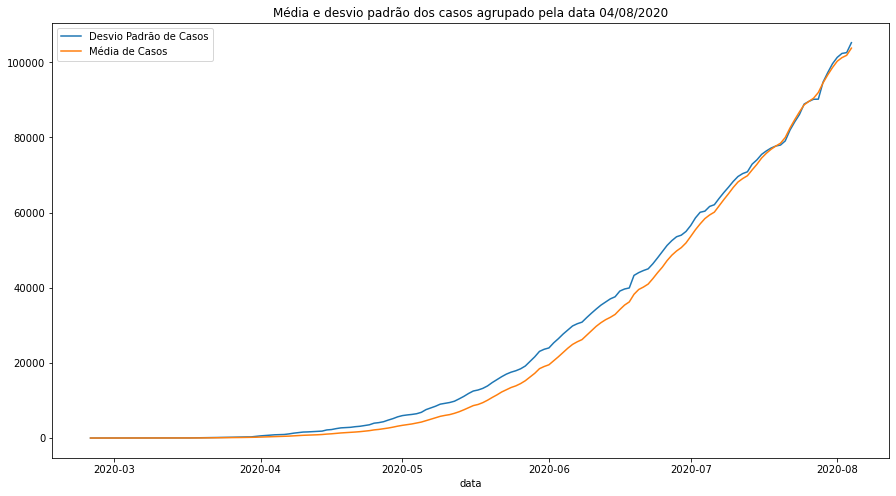

In [21]:
df_group_data_mean = df[["data", "casos"]].groupby(["data"]).mean()

df_group_data_mean = df_group_data_mean.rename(columns = {'casos': 'Média de Casos'})

df_group_data_std = df[["data", "casos"]].groupby(["data"]).std()

df_group_data_std = df_group_data_std.rename(columns = {'casos': 'Desvio Padrão de Casos'})

ax = df_group_data_std.plot(kind = "line", label = "Média")

df_group_data_mean.plot(
    kind = "line",
    ax = ax,
    title = "Média e desvio padrão dos casos agrupado pela data {}".format(ultima_data),
    figsize = (15, 8)
)

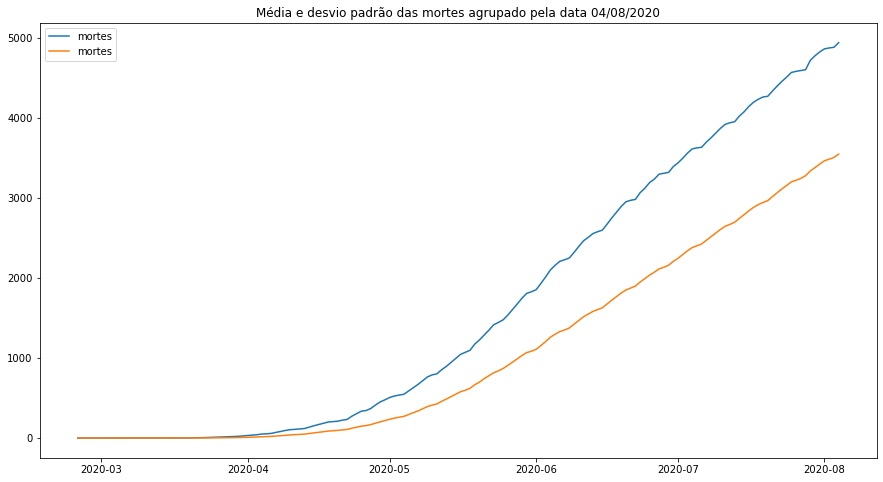

In [26]:

df_group_data_mean = df[["data", "mortes"]].groupby(["data"]).mean()

df_group_data_mean = df_group_data_mean.rename(columns = {'casos': 'Média de Casos'})

df_group_data_std = df[["data", "mortes"]].groupby(["data"]).std()

df_group_data_std = df_group_data_std.rename(columns = {'casos': 'Desvio Padrão de Casos'})

ax = df_group_data_std.plot(kind = "line", label = "Média")

df_group_data_mean.plot(kind = "line", ax = ax)

configurar_plot(
    "Média e desvio padrão das mortes agrupado pela data {}".format(ultima_data), 
    "",
    "",
    15,
    8
)